Base Image Loaded with examples: 23949
Scattering Flare Image: Flare7K  is loaded successfully with examples 5000
Now we have 5000 scattering flare images
Reflective Flare Image: Flare7K  is loaded successfully with examples 2000
Now we have 2000 refelctive flare images


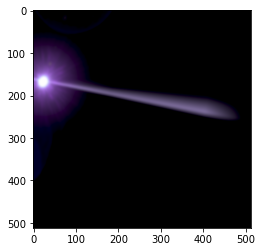

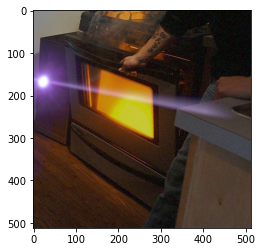

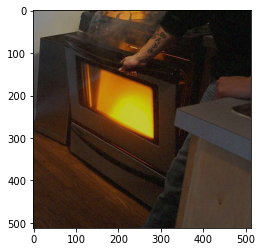

In [21]:
import torchvision.transforms as transforms
from matplotlib import pyplot as plt
from data_loader import Flare_Image_Loader

transform_base=transforms.Compose([transforms.RandomCrop((512,512),pad_if_needed=True,padding_mode='reflect'),
							  transforms.RandomHorizontalFlip(),
							  transforms.RandomVerticalFlip()
                              ])

transform_flare=transforms.Compose([transforms.RandomAffine(degrees=(0,360),scale=(0.8,1.5),translate=(300/1440,300/1440),shear=(-20,20)),
                              transforms.CenterCrop((512,512)),
							  transforms.RandomHorizontalFlip(),
							  transforms.RandomVerticalFlip()
                              ])

flare_image_loader=Flare_Image_Loader('Flickr24K',transform_base,transform_flare)
flare_image_loader.load_scattering_flare('Flare7K','Flare7k/Scattering_Flare/Compound_Flare')
flare_image_loader.load_reflective_flare('Flare7K','Flare7k/Reflective_Flare')
img_index=2671
test_base_img,test_flare_img,test_merge_img,flare_mask=flare_image_loader[img_index]

plt.imshow(test_flare_img.permute(1,2,0))
plt.show()
plt.imshow(test_merge_img.permute(1,2,0))
plt.show()
plt.imshow(test_base_img.permute(1,2,0))
plt.show()

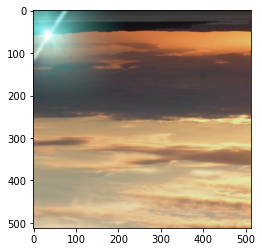

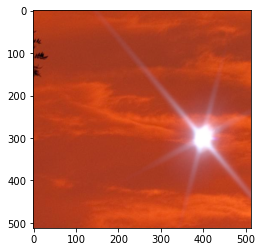

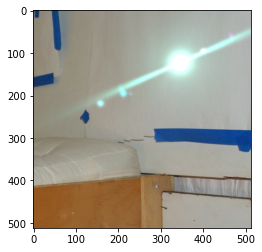

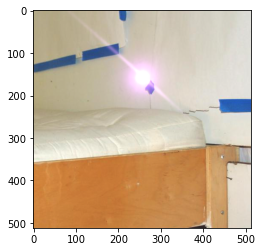

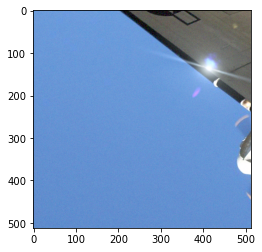

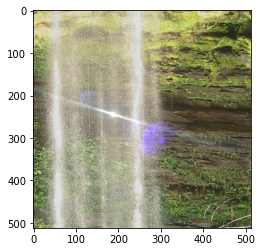

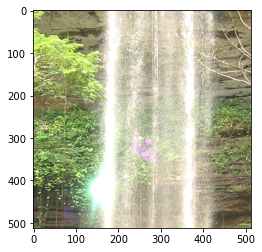

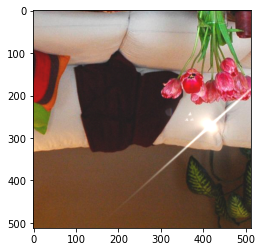

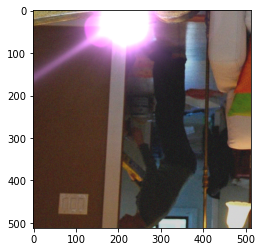

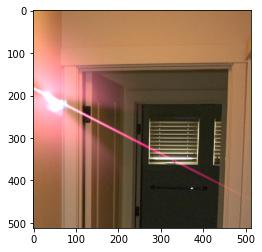

In [16]:
for i in range(10):
    test_base_img,test_flare_img,test_merge_img,flare_mask=flare_image_loader[i]
    plt.imshow(test_merge_img.permute(1,2,0))
    img_tensor=test_merge_img.permute(1,2,0)
    img_numpy=img_tensor.numpy()
    plt.show()